In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
%matplotlib inline

In [3]:
train =pd.read_csv('train.csv')
train.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [4]:
test=pd.read_csv('test.csv')
test.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [5]:
test.describe([0.25,0.5,0.75,0.90,0.99])

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000
mean,37339.022081,38.385235,15.592416,7287.306040,0.834362,49.927315,1.659329,55.603624
std,21453.129293,12.097904,11.133792,2156.737934,0.996511,28.702307,1.545401,25.352807
min,5.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18825.500000,28.000000,7.000000,5633.750000,0.000000,25.000000,0.000000,36.000000
50%,37433.000000,38.000000,13.000000,7332.000000,1.000000,50.000000,1.000000,56.000000
75%,55857.500000,49.000000,23.000000,8852.000000,2.000000,75.000000,3.000000,75.000000
90%,66967.900000,55.000000,32.000000,10094.000000,2.000000,90.000000,4.000000,89.000000
99%,73631.030000,59.000000,45.000000,12171.050000,4.000000,99.000000,5.000000,111.000000
max,74471.000000,59.000000,51.000000,15063.000000,4.000000,99.000000,6.000000,127.000000


In [6]:
train.describe([0.25,0.5,0.75,0.90,0.99])

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
90%,67062.300000,55.000000,33.000000,10107.000000,2.000000,90.000000,4.000000,89.000000
99%,73782.030000,59.000000,46.000000,12139.090000,4.000000,98.000000,6.000000,110.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [7]:
df_train_sorted = train.sort_values(by='Monthly Income')
df_train_sorted.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
56323,22413,47,Female,25,Finance,1316,Fair,High,High,0,...,4,Entry,Small,38,No,No,No,Poor,Medium,Left
53083,18734,35,Female,17,Education,1435,Fair,High,Average,1,...,0,Entry,Small,41,No,No,No,Fair,Very High,Left
48646,38056,34,Female,18,Finance,1516,Good,Low,High,0,...,2,Mid,Medium,28,No,No,No,Good,Medium,Left
13089,68585,34,Male,3,Education,1575,Excellent,High,Average,2,...,0,Senior,Small,9,No,No,No,Good,Medium,Stayed
55153,3970,58,Female,29,Finance,1786,Good,High,Average,0,...,1,Entry,Small,35,No,No,No,Good,High,Stayed


In [8]:
train.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [9]:
test.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [10]:
test.info

<bound method DataFrame.info of        Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0            52685   36    Male                13  Healthcare            8029   
1            30585   35    Male                 7   Education            4563   
2            54656   50    Male                 7   Education            5583   
3            33442   58    Male                44       Media            5525   
4            15667   39    Male                24   Education            4604   
...            ...  ...     ...               ...         ...             ...   
14895        16243   56  Female                42  Healthcare            7830   
14896        47175   30  Female                15   Education            3856   
14897        12409   52    Male                 5   Education            5654   
14898         9554   18    Male                 4   Education            5276   
14899        73042   59  Female                48   Education            3774

In [11]:
train.info

<bound method DataFrame.info of        Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0             8410   31    Male                19   Education            5390   
1            64756   59  Female                 4       Media            5534   
2            30257   24  Female                10  Healthcare            8159   
3            65791   36  Female                 7   Education            3989   
4            65026   56    Male                41   Education            4821   
...            ...  ...     ...               ...         ...             ...   
59593        37195   50  Female                12   Education            4414   
59594         6266   18    Male                 4  Healthcare            8040   
59595        54887   22  Female                14  Technology            7944   
59596          861   23    Male                 8   Education            2931   
59597        15796   56    Male                19  Technology            6660

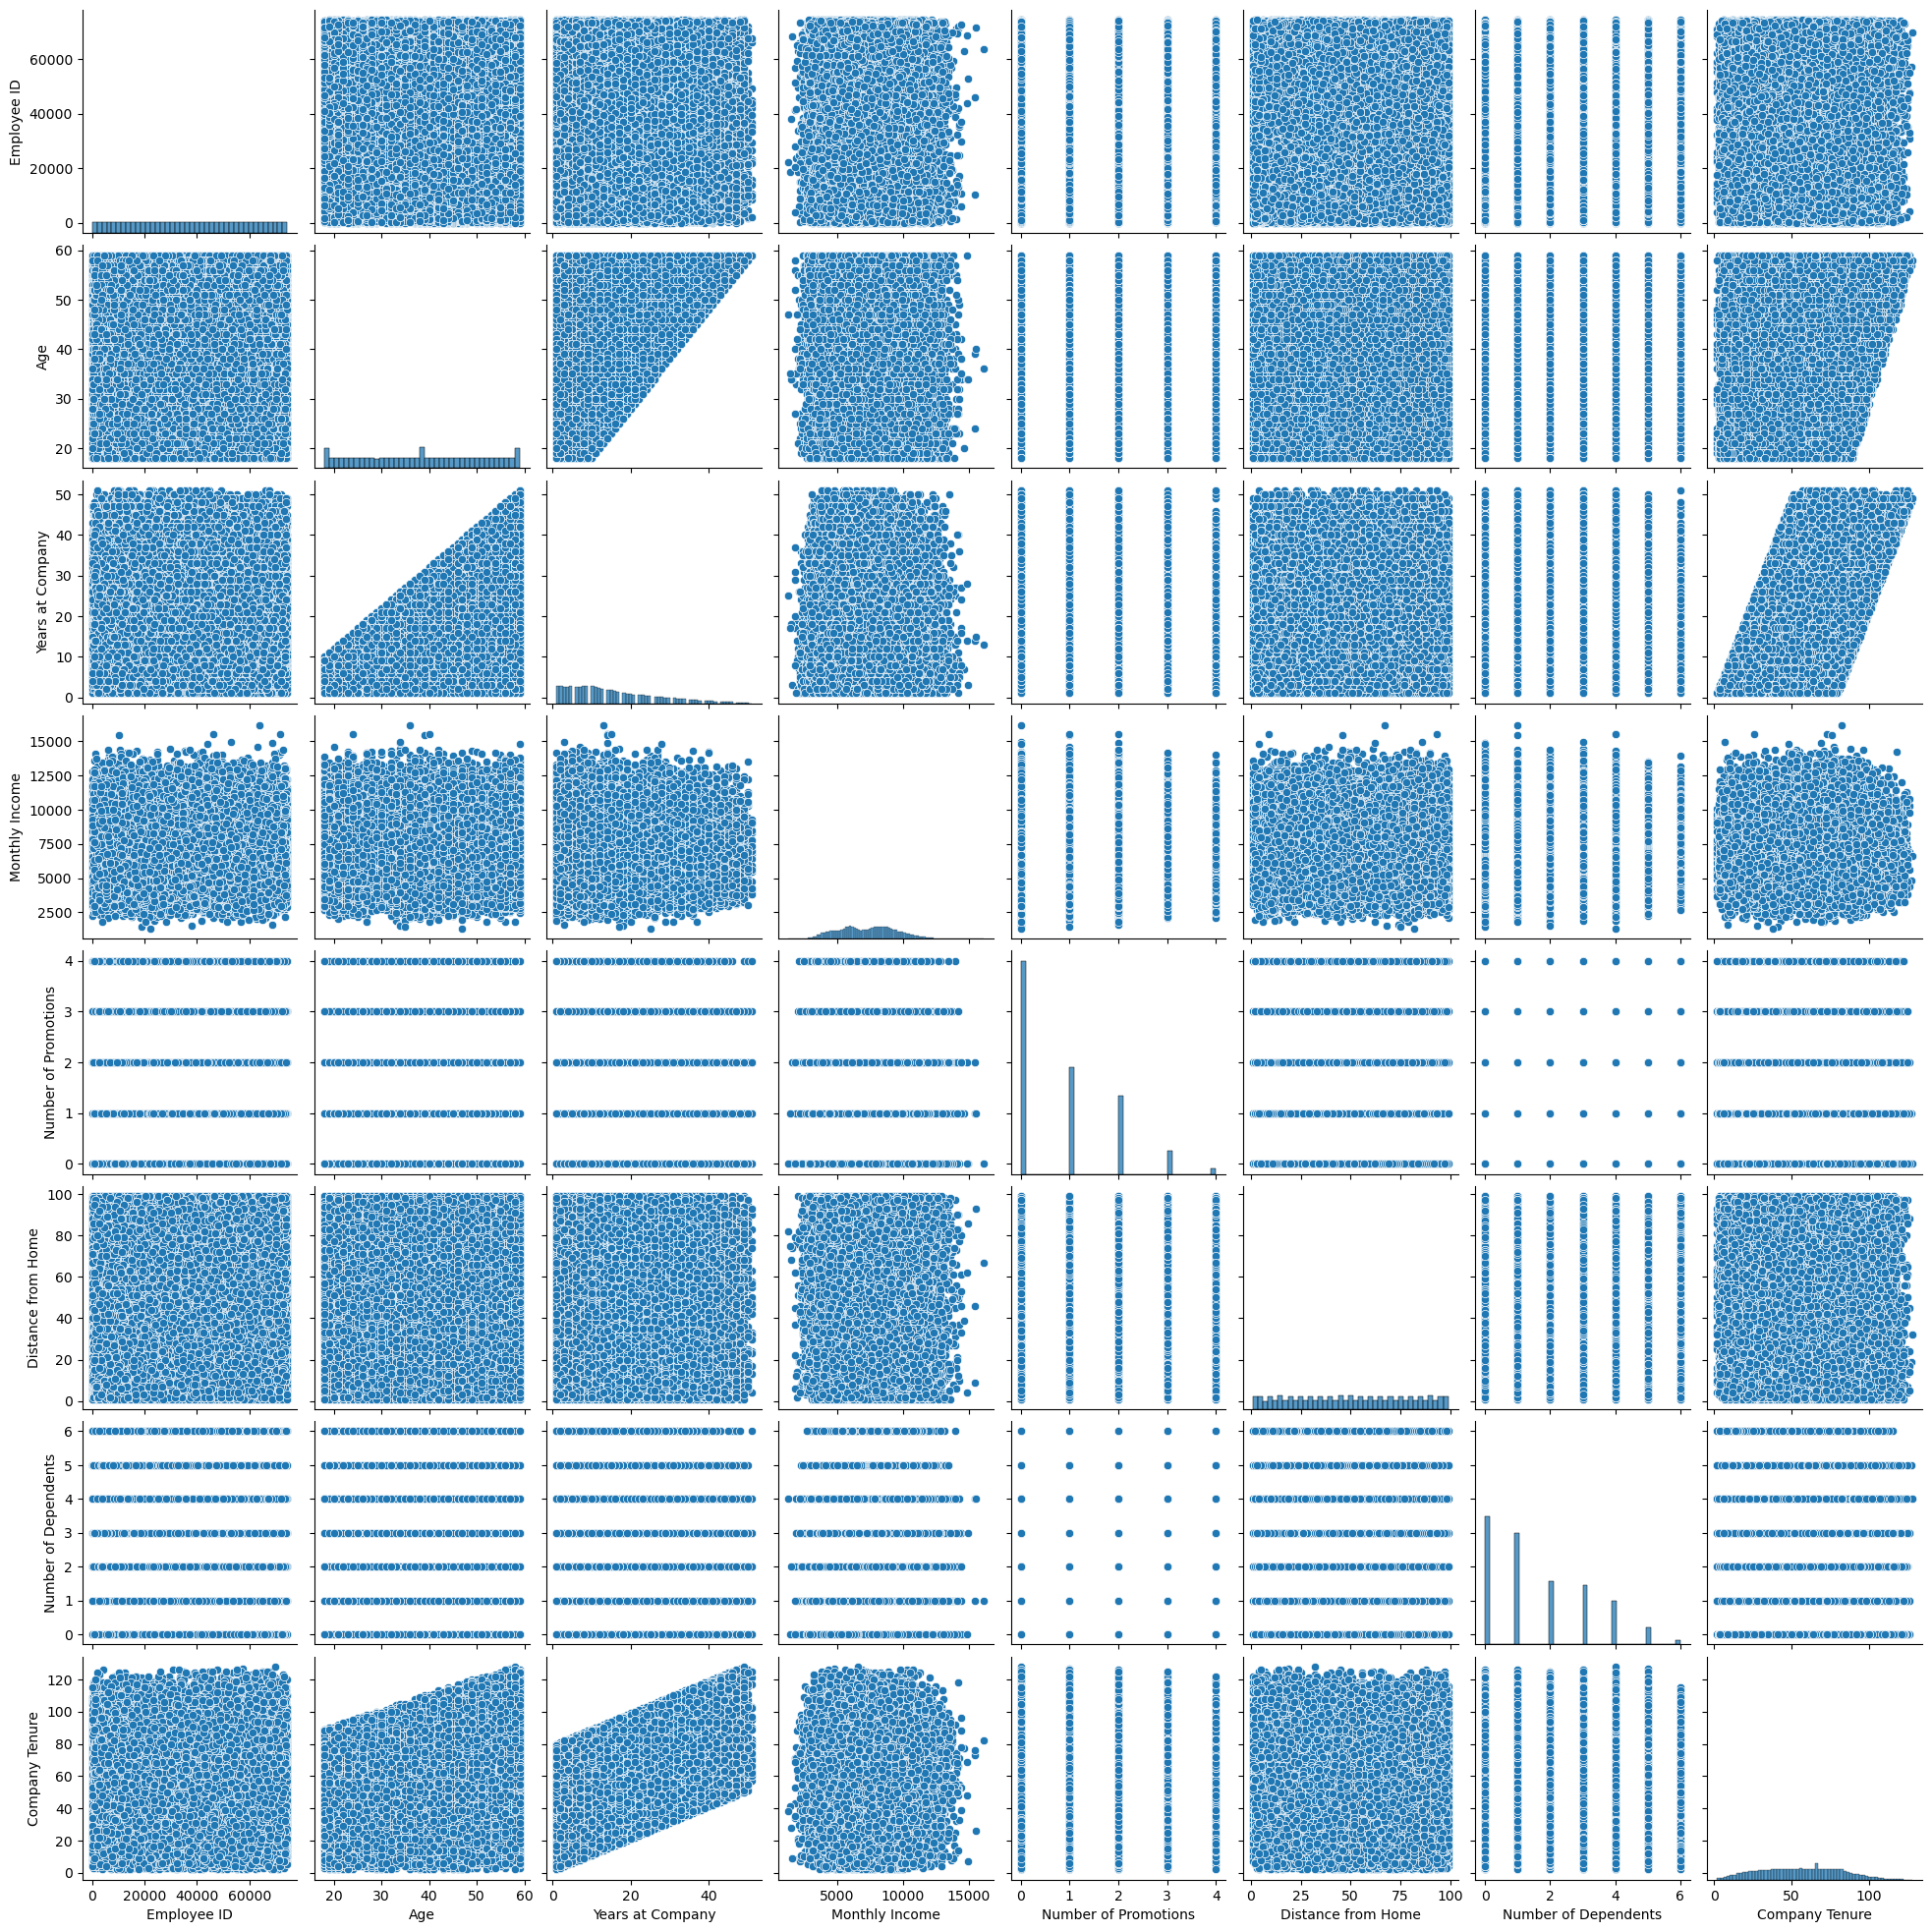

In [12]:
sns.pairplot(train)

In [13]:
df_train=train['Attrition'].value_counts()
df_train

Attrition
Stayed    31260
Left      28338
Name: count, dtype: int64

In [14]:
df_test=test['Attrition'].value_counts()
df_test

Attrition
Stayed    7868
Left      7032
Name: count, dtype: int64

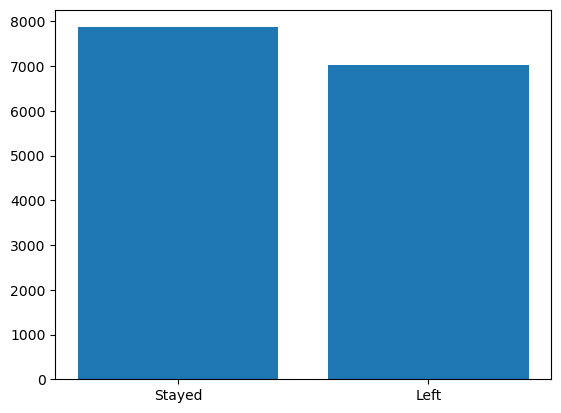

In [15]:
#bar of test
df_test = test['Attrition'].value_counts()
categories = df_test.index
counts = df_test.values
plt.bar(categories, counts)
plt.show()


<BarContainer object of 2 artists>

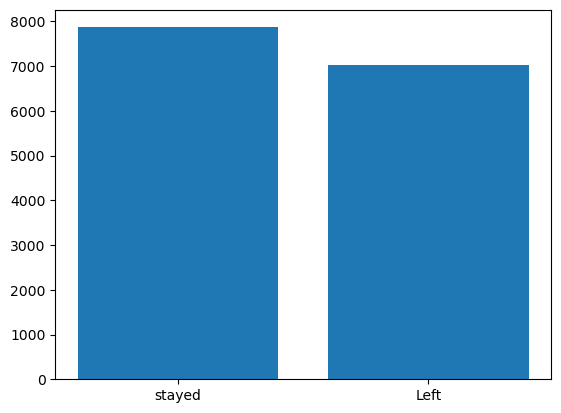

In [16]:
#bar of test
plots=['stayed','Left']
plt.bar(plots,height=df_test)

<BarContainer object of 2 artists>

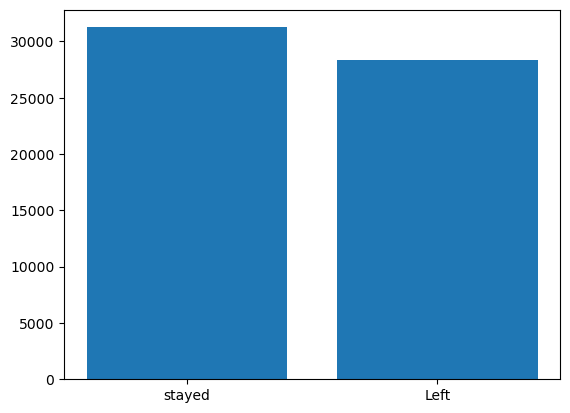

In [17]:
#bar of train
plots1=['stayed','Left']
plt.bar(plots,height=df_train)

In [18]:
numerical_feats = test.dtypes[test.dtypes!="object"].index
print("# of numericals features =", len(numerical_feats))
categorical_feats = test.dtypes[test.dtypes=="object"].index
print("# of  categorical_feats =", len(categorical_feats))
print(numerical_feats)
print(categorical_feats)



# of numericals features = 8
# of  categorical_feats = 16
Index(['Employee ID', 'Age', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Company Tenure'],
      dtype='object')
Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')


In [19]:
numerical_feats = train.dtypes[train.dtypes!="object"].index
print("# of numericals features =", len(numerical_feats))
categorical_feats = train.dtypes[train.dtypes=="object"].index
print("# of categorical_feats =", len(categorical_feats))
print(numerical_feats)
print(categorical_feats)


# of numericals features = 8
# of categorical_feats = 16
Index(['Employee ID', 'Age', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Company Tenure'],
      dtype='object')
Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')


In [20]:
!pip install seaborn --upgrade

In [21]:
import seaborn as sns

<Axes: >

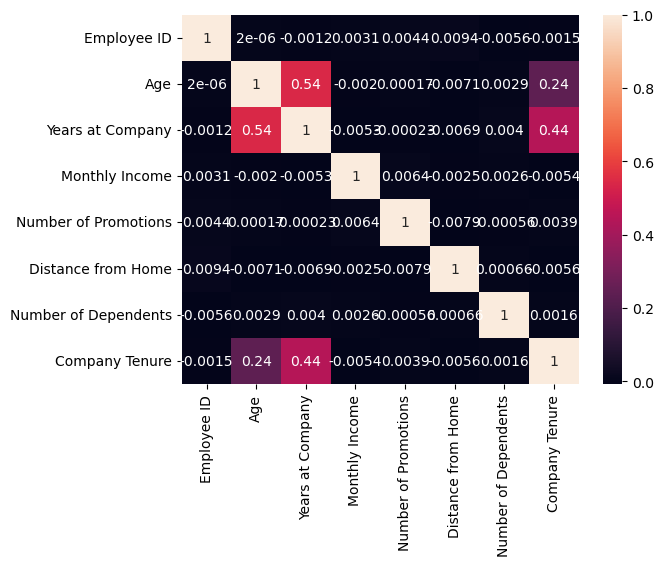

In [22]:
sns.heatmap(train[numerical_feats].corr(), annot=True, color='pink')

<Axes: >

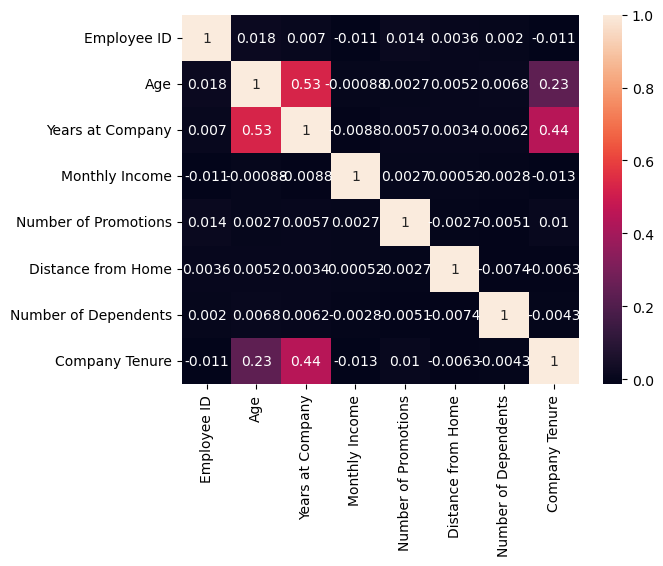

In [23]:
sns.heatmap(test[numerical_feats].corr(), annot=True)

In [24]:
x=train[numerical_feats]
x.drop(['Employee ID'],axis=1 , inplace=True)
y=train['Attrition'].map({'Stayed':1,'Left':0})


In [25]:
x.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
0,31,19,5390,2,22,0,89
1,59,4,5534,3,21,3,21
2,24,10,8159,0,11,3,74
3,36,7,3989,1,27,2,50
4,56,41,4821,0,71,0,68


In [81]:
y.head()
y.value_counts()

Attrition
1    31260
0    28338
Name: count, dtype: int64

In [27]:
model =SVC(C=1)

In [28]:
model.fit(x,y)

SVC(C=1)

In [66]:
x_test= test[numerical_feats]
x_test.drop(['Employee ID'],axis=1 , inplace=True)
y_test=test['Attrition'].map({'Stayed':1,'Left':0})


In [ ]:

yhat=model.predict(x_test)
yhat


In [77]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,yhat))
print(classification_report(y_test,yhat))

[[   0 7032]
 [   0 7868]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7032
           1       0.53      1.00      0.69      7868

    accuracy                           0.53     14900
   macro avg       0.26      0.50      0.35     14900
weighted avg       0.28      0.53      0.36     14900

